# Comparing the Performance of Machine Learning Methods for Predicting Material Properties
This notebook makes some tests to assess the performance of different strategies in [Ward (2016)](https://www.nature.com/articles/npjcompumats201628) for predicting the properties of materials with machine learning. 
For the regression strategies, we use linear regression, Decision Tree, Rotation ForestRegressor and Random Subspace. For the classification strategies, we use Decision Tree, Rotation ForestRegressor and Random Subspace.
The data sets used in this notebook is boltztrap_mp, citrine_thermal_conductivity and glass_ternary_landolt.

Packages need installing:
sklearn
matminer

In [ ]:
!pip install sklearn
!pip install matminer

In [1]:
from ModelTuner import ModelTuner, test, load_dataset, compare
from RotationTree import RotationForestRegressor, RotationForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
import warnings
warnings.filterwarnings("ignore")

# Initialize models and params to be tuned 
For decision tree, we try to tune the number of features to consider each time to make the split decision and max depth of the tree.
For rotation forest, we try to tune the number of features in each subset and number of features to consider each time to make the split decision. 
For random subspace, we try to tune the number of features to draw from data to train each decision tree and the number of decision tree in the model.

In [2]:
#calculate the number of features for each subset for the rotation forest
features = []
for i in range(14,145):
    features.append(int(145/i))
features = list(set(features))
#list contains the regression models to be trained
rmodel = [DecisionTreeRegressor(),RotationForestRegressor(),BaggingRegressor(DecisionTreeRegressor())]
#list contains the classification models to be trained
cmodel = [DecisionTreeClassifier(),RotationForestClassifier(),BaggingClassifier(DecisionTreeClassifier())]
#list contains the params to be tuned for each model
params = [[('max_features',range(5,15)),('max_depth',range(10,100,10))],[('n_features_per_subset',features),('max_features',range(10,15))],[('max_features',[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]),('n_estimators',range(1,10))]]
#list contains the file name for recording the best params for each models
rrecordfile = ['DecisionTree_Regressor.csv','RotationForest_Regressor.csv','RandomSubspace_Regressor.csv','LinearRegression_Regressor.csv']
crecordfile = ['DecisionTree_Classifier.csv','RotationForest_Classifier.csv','RandomSubspace_Classifier.csv']
rmodeltuner = []
cmodeltuner = []
for i in range(len(params)):
    rmodeltuner.append(ModelTuner(rmodel[i],params[i]))
    cmodeltuner.append(ModelTuner(cmodel[i],params[i]))

Load the dataset bolztrap for regression problems 

In [3]:
%%time
df = load_dataset('boltztrap_mp')

CPU times: user 9.72 s, sys: 318 ms, total: 10 s
Wall time: 10 s


In [4]:
df.columns

Index(['mpid', 'pf_n', 'pf_p', 's_n', 's_p', 'formula', 'm_n', 'm_p',
       'structure'],
      dtype='object')

In [5]:
df.head(2)

,mpid,pf_n,pf_p,s_n,s_p,formula,m_n,m_p,structure
0,mp-10070,0.865,0.0125,-421.0,760.0,BaAg(PO3)3,0.578,72.80,"[[ 0.08245398 10.58009491 11.61923254] O, [3.1..."
1,mp-10086,1.050,0.6440,-393.0,567.0,YSF,0.541,4.02,"[[2.84699546 0.94899849 0. ] F, [0.9489..."



Removed 0/8924 entries with NaN or infinite property
Removed 1544/8924 duplicate entries 



Generated 145 features
Training set size: 7380x145
Removed 1/7380 entries with NaN or infinite features
Removed 1/7380 entries with NaN or infinite property
CPU times: user 7min 16s, sys: 17.9 s, total: 7min 34s
Wall time: 2min 49s


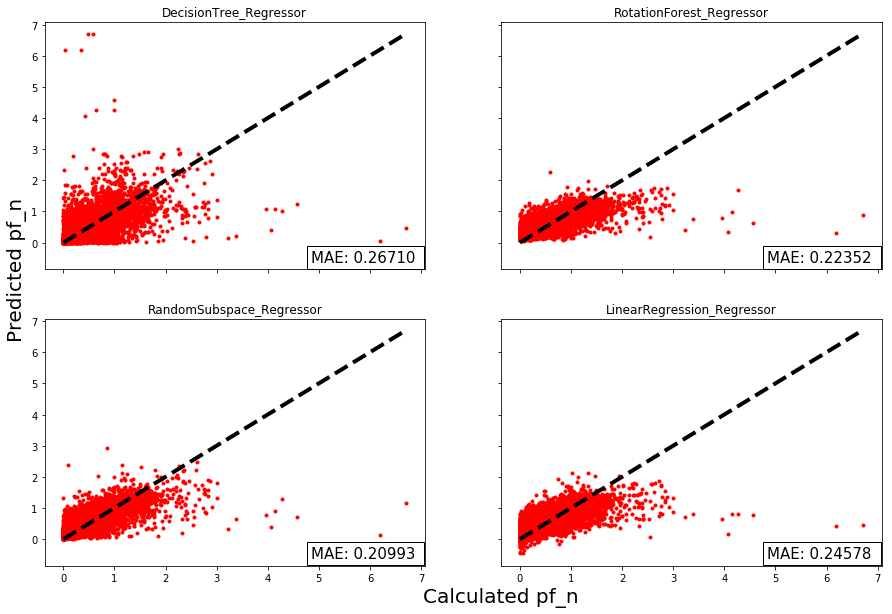

In [6]:
%%time
test(df,'pf_n','formula',True,False,rmodeltuner,rrecordfile,'boltztrap_mp')


Removed 0/8924 entries with NaN or infinite property
Removed 1544/8924 duplicate entries 



Generated 145 features
Training set size: 7380x145
Removed 1/7380 entries with NaN or infinite features
Removed 1/7380 entries with NaN or infinite property
CPU times: user 7min 42s, sys: 16.6 s, total: 7min 58s
Wall time: 3min


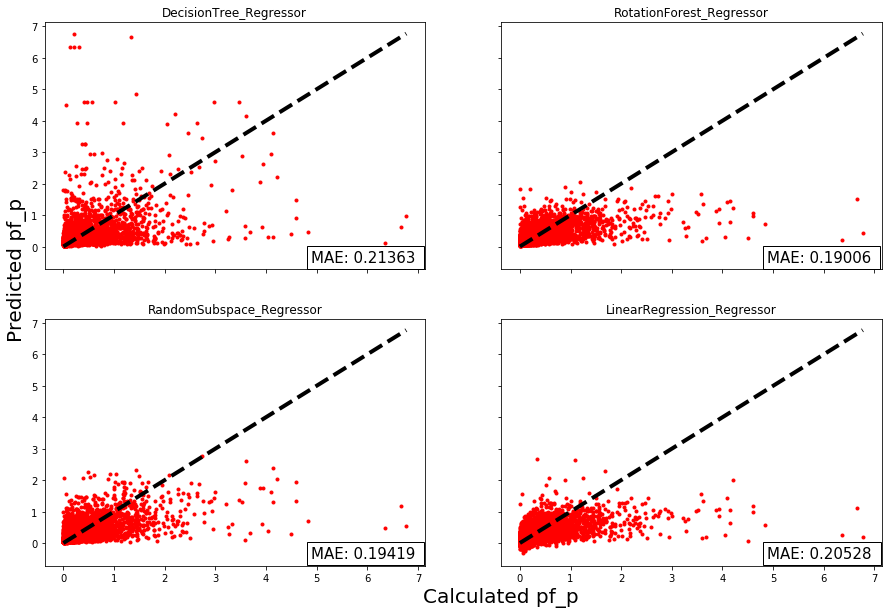

In [7]:
%%time
test(df,'pf_p','formula',True,False,rmodeltuner,rrecordfile,'boltztrap_mp')


Removed 0/8924 entries with NaN or infinite property
Removed 1544/8924 duplicate entries 



Generated 145 features
Training set size: 7380x145
Removed 1/7380 entries with NaN or infinite features
Removed 1/7380 entries with NaN or infinite property
CPU times: user 8min 48s, sys: 17.3 s, total: 9min 5s
Wall time: 2min 48s


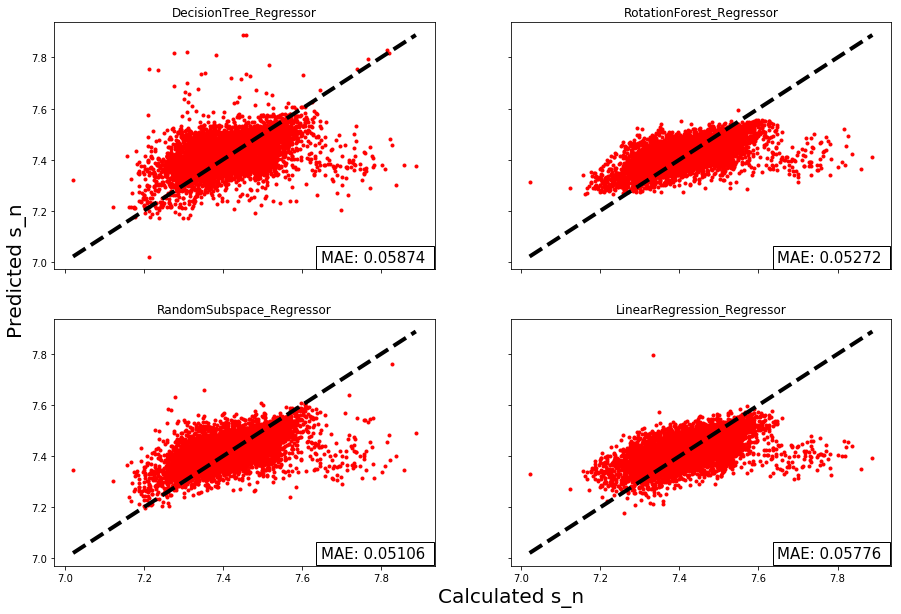

In [8]:
%%time
test(df,'s_n','formula',True,True,rmodeltuner,rrecordfile,'boltztrap_mp')


Removed 0/8924 entries with NaN or infinite property
Removed 1544/8924 duplicate entries 



Generated 145 features
Training set size: 7380x145
Removed 1/7380 entries with NaN or infinite features
Removed 1/7380 entries with NaN or infinite property
CPU times: user 9min 41s, sys: 19.8 s, total: 10min 1s
Wall time: 3min 30s


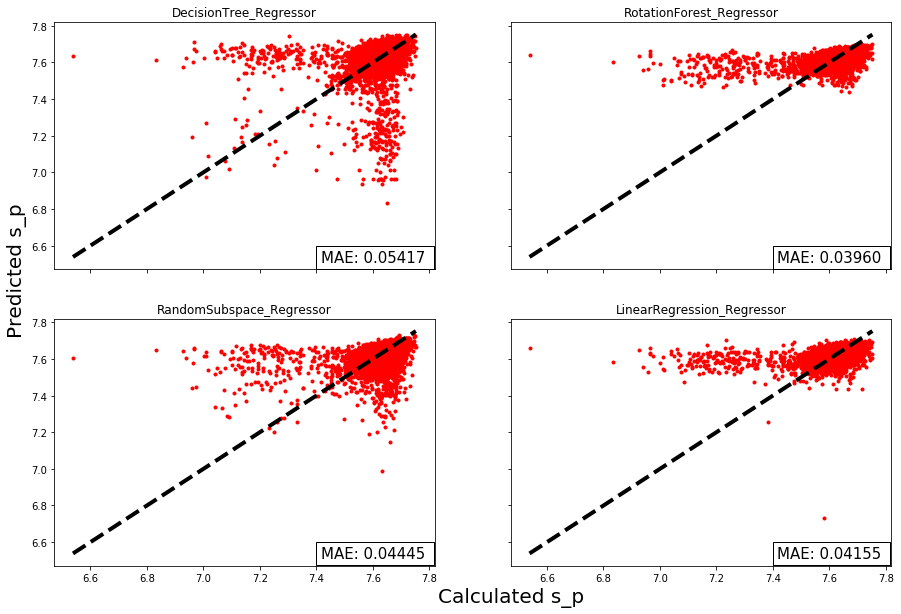

In [9]:
%%time
test(df,'s_p','formula',True,True,rmodeltuner,rrecordfile,'boltztrap_mp')


Removed 0/8924 entries with NaN or infinite property
Removed 1544/8924 duplicate entries 



Generated 145 features
Training set size: 7380x145
Removed 1/7380 entries with NaN or infinite features
Removed 4/7380 entries with NaN or infinite property
CPU times: user 7min 32s, sys: 17.9 s, total: 7min 50s
Wall time: 2min 47s


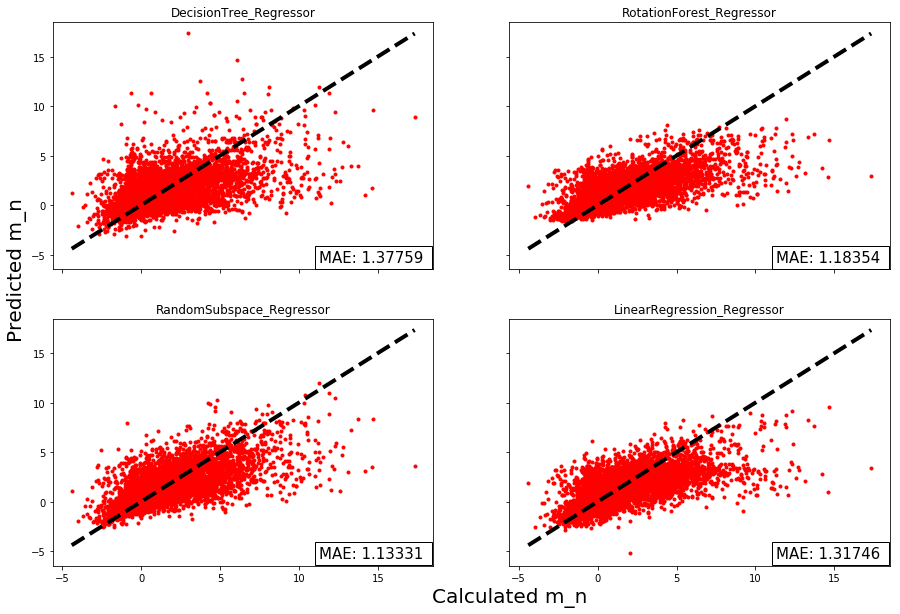

In [10]:
%%time
test(df,'m_n','formula',True,True,rmodeltuner,rrecordfile,'boltztrap_mp')


Removed 0/8924 entries with NaN or infinite property
Removed 1544/8924 duplicate entries 



Generated 145 features
Training set size: 7380x145
Removed 1/7380 entries with NaN or infinite features
Removed 4/7380 entries with NaN or infinite property
CPU times: user 8min 42s, sys: 18.6 s, total: 9min 1s
Wall time: 3min


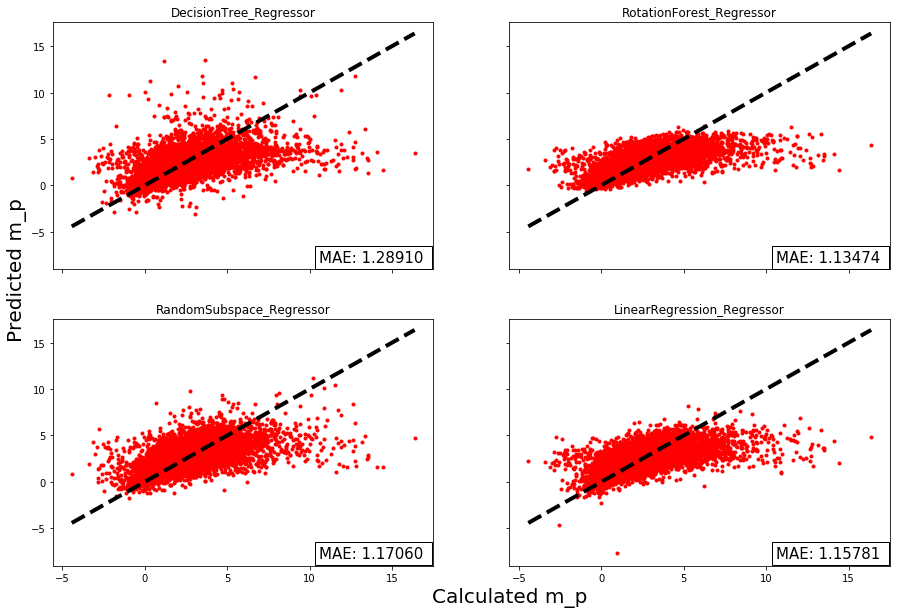

In [11]:
%%time
test(df,'m_p','formula',True,True,rmodeltuner,rrecordfile,'boltztrap_mp')

Load the dataset citrine_thermal_conductivity for regression problems 

In [12]:
%%time
df = load_dataset('citrine_thermal_conductivity')
df = df[(df['k_condition'].isin([300, 'room temperature', 'Room temperature', '298']))]

CPU times: user 7.08 ms, sys: 1.74 ms, total: 8.82 ms
Wall time: 7.74 ms


In [13]:
df.columns

Index(['formula', 'k_expt', 'k-units', 'k_condition', 'k_condition_units'], dtype='object')

In [14]:
df.head(2)

,formula,k_expt,k-units,k_condition,k_condition_units
0,BeS,157.0,W/m.K,room temperature,"[{'name': 'Temperature', 'scalars': [{'value':..."
1,CdS,19.9,W/m.K,room temperature,"[{'name': 'Temperature', 'scalars': [{'value':..."



Removed 0/83 entries with NaN or infinite property
Removed 36/83 duplicate entries 



Generated 145 features
Training set size: 47x145
Removed 0/47 entries with NaN or infinite features
Removed 1/47 entries with NaN or infinite property
CPU times: user 28.5 s, sys: 2.97 s, total: 31.5 s
Wall time: 8.59 s


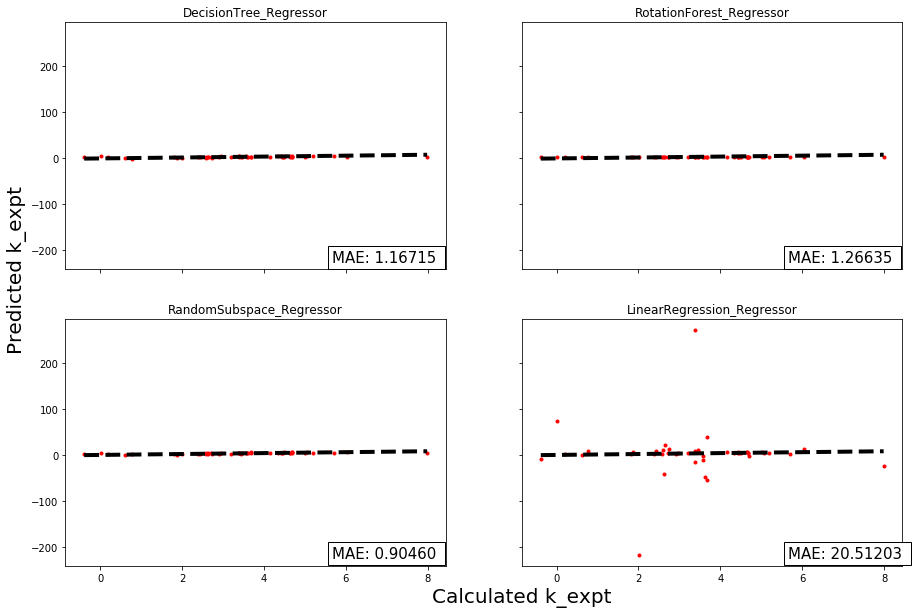

In [15]:
%%time
test(df,'k_expt','formula',True,True,rmodeltuner,rrecordfile,'citrine_thermal_conductivity')

Load the dataset glass_ternary_landolt for classification problems 

In [16]:
%%time
df = load_dataset('glass_ternary_landolt')
df=df[(df['processing'].isin(['meltspin']))]

CPU times: user 56.1 ms, sys: 6.59 ms, total: 62.7 ms
Wall time: 42.2 ms


In [17]:
df.columns

Index(['formula', 'phase', 'processing', 'gfa'], dtype='object')

In [18]:
df.head(2)

,formula,phase,processing,gfa
0,Ag20Al25La55,AM,meltspin,1
1,Ag15Al10Mg75,AM,meltspin,1


In [19]:
%%time
test(df,'gfa','formula',False,False,cmodeltuner,crecordfile,'glass_ternary_landolt')


Removed 0/6780 entries with NaN or infinite property
Removed 1467/6780 duplicate entries 



Generated 145 features
Training set size: 5313x145
Removed 0/5313 entries with NaN or infinite features
Removed 0/5313 entries with NaN or infinite property
gfa 0.8531951347294792
gfa 0.8855709188224801
gfa 0.880862820894043
CPU times: user 6min 26s, sys: 16.7 s, total: 6min 43s
Wall time: 2min 26s


# Now we compare the performances of different models

In [20]:
compare('boltztrap_mp',True,rrecordfile)

,['DecisionTree_Regressor'],['RotationForest_Regressor'],['RandomSubspace_Regressor'],['LinearRegression_Regressor'],Best_Model
boltztrap_mp/pf_n,0.267101,0.223525,0.209928,0.245776,['RandomSubspace_Regressor']
boltztrap_mp/pf_p,0.213632,0.190055,0.194186,0.205284,['RotationForest_Regressor']
boltztrap_mp/s_n,0.058736,0.052719,0.051063,0.057760,['RandomSubspace_Regressor']
boltztrap_mp/s_p,0.054170,0.039597,0.044450,0.041546,['RotationForest_Regressor']
boltztrap_mp/m_n,1.377587,1.183537,1.133310,1.317463,['RandomSubspace_Regressor']
boltztrap_mp/m_p,1.289100,1.134740,1.170596,1.157813,['RotationForest_Regressor']


In [21]:
compare('citrine_thermal_conductivity',True,rrecordfile)

,['DecisionTree_Regressor'],['RotationForest_Regressor'],['RandomSubspace_Regressor'],['LinearRegression_Regressor'],Best_Model
citrine_thermal_conductivity/k_expt,1.167147,1.266354,0.904601,20.512034,['RandomSubspace_Regressor']


In [22]:
compare('glass_ternary_landolt',False,crecordfile)

,['DecisionTree_Classifier'],['RotationForest_Classifier'],['RandomSubspace_Classifier'],Best_Model
glass_ternary_landolt/gfa,0.853195,0.885571,0.880863,['RotationForest_Classifier']
